# 고금계 과제 1

20249433 최재필

In [330]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

In [331]:
pd.set_option('future.no_silent_downcasting', True)

In [332]:
CWD = Path('.').resolve()
DATA_DIR = CWD / 'data'

In [333]:
from fndata import FnStockData
from fndata import FnMarketData

## Load data

In [334]:
fndata_path = DATA_DIR / '고금계과제1_v3.3_201301-202408.csv'
fnmkt_path = DATA_DIR / '고금계과제_시장수익률_201301-202408.csv'
rf_path = DATA_DIR / '통안채1년물_월평균_201301-202408.csv'

In [335]:
END_DATE = '2023-12-31'

### 주식 데이터

In [336]:
# 데이터 모듈을 생성하며 기본 전처리들을 수행합니다.
fn = FnStockData(fndata_path)

In [337]:
# 사용 가능한 데이터를 확인합니다.
fn_items = fn.get_items()
fn_items

array(['종가(원)', '수정계수', '수정주가(원)', '수익률 (1개월)(%)', 'FnGuide Sector',
       '거래정지여부', '관리종목여부', '보통주자본금(천원)', '자본잉여금(천원)', '이익잉여금(천원)',
       '자기주식(천원)', '이연법인세부채(천원)', '매출액(천원)', '매출원가(천원)', '이자비용(천원)',
       '영업이익(천원)', '총자산(천원)', '기말발행주식수 (보통)(주)'], dtype=object)

In [338]:
# 분석 기간의 데이터 유니버스를 확인합니다. (금융업종, 거래정지, 관리종목 제외)
univ_list = fn.get_universe()
univ_list

array(['A000020', 'A000040', 'A000050', ..., 'A001260', 'A019660',
       'A023460'], dtype=object)

In [339]:
# long format (전부)

df = fn.get_data()
df.head()

Item Name          FnGuide Sector 거래정지여부 관리종목여부  기말발행주식수 (보통)(주)  \
date       Symbol                                                  
2013-01-31 A000020             의료     정상     정상       27931470.0   
           A000040          경기소비재     정상     정상      119341379.0   
           A000050          경기소비재     정상     정상        2492298.0   
           A000070            산업재     정상     정상        7704997.0   
           A000080          필수소비재     정상     정상       69477714.0   

Item Name                매출액(천원)      매출원가(천원)   보통주자본금(천원)  수익률 (1개월)(%)  \
date       Symbol                                                           
2013-01-31 A000020  2.202406e+08  1.165344e+08   27931470.0         -0.17   
           A000040  9.955327e+07  9.199679e+07   59670690.0          0.20   
           A000050  3.471896e+08  2.514682e+08   12461490.0         -3.46   
           A000070  2.329145e+09  2.025952e+09   40852325.0         -4.51   
           A000080  1.897469e+09  1.074666e+09  363168055.0          5.26   

Item Name           수정계수  수정주가(원)     영업이익(천원)  이연법인세부채(천원)    이익잉여금(천원)  \
date       Symbol                                                          
2013-01-31 A000020   1.0   6030.0    2062220.0          0.0  170147330.0   
           A000040   1.0   8727.0   -3486600.0    7181340.0    1298918.0   
           A000050   1.0   7874.0   36031739.0   90652345.0  612310562.0   
           A000070   1.0  67800.0    2472122.0  110818108.0  871019983.0   
           A000080   1.0  32000.0  161051461.0   23405084.0  422540903.0   

Item Name             이자비용(천원)     자기주식(천원)    자본잉여금(천원)    종가(원)  \
date       Symbol                                                   
2013-01-31 A000020    384335.0          0.0   26919758.0   6030.0   
           A000040    813333.0      -5044.0    3884892.0    495.0   
           A000050  13944625.0          0.0   13991400.0  86500.0   
           A000070  17176000.0   -9982000.0  355855971.0  67800.0   
           A000080  56438096.0 -122693570.0  709299321.0  32000.0   

Item Name                총자산(천원)  
date       Symbol                 
2013-01-31 A000020  3.161655e+08  
           A000040  1.169316e+08  
           A000050  1.296989e+09  
           A000070  2.595068e+09  
           A000080  3.553147e+09

In [340]:
# wide format

monthly_returns = fn.get_data('수익률 (1개월)(%)')
monthly_returns = monthly_returns.loc[:END_DATE, :]
monthly_returns.head()

Symbol,A000020,A000040,A000050,A000070,A000080,A000100,A000120,A000140,A000150,A000180,...,A014940,A053810,A007390,A002410,A037950,A038880,A015020,A001260,A019660,A023460
date,,,,,,,,,,,,,,,,,,,,,
2013-01-31,-0.0017,0.0020,-0.0346,-0.0451,0.0526,0.0607,0.1940,-0.0122,-0.0039,-0.0559,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-28,0.0033,-0.0470,0.0537,0.0251,0.0791,-0.0028,-0.0295,-0.0414,0.0078,0.0520,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-31,0.0133,-0.0064,0.0288,0.0187,-0.0073,0.0700,-0.1452,0.0432,0.0039,0.1621,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-30,0.1047,0.0000,0.2594,0.3239,-0.0473,0.0995,0.0783,-0.1302,-0.0502,0.0946,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-31,0.0267,0.0475,0.1667,-0.0598,-0.0140,-0.1167,-0.0283,-0.0238,0.1545,0.0367,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [341]:
close = fn.get_data('종가(원)')
close = close.loc[:END_DATE, :]

close.isnull().sum().sum() , monthly_returns.isnull().sum().sum()

# monthly return이 close보다 결측치가 많음. 
# 보수적으로 잡기 위해 결측치가 많은 monthly_return을 기준으로 universe mask를 만들겠다. 

(95306, 96153)

In [342]:
univ_mask_df = monthly_returns.notnull()
univ_mask_df = univ_mask_df.copy() # bool

univ_mask_df = univ_mask_df.replace({True: 1, False: np.nan}).astype(float) # mask universe nan where firm doesn't exist.

# C:\Users\chlje\AppData\Local\Temp\ipykernel_16008\3440262636.py:2: 
# FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. 
# To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. 
# To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [391]:
univ_mask_df = monthly_returns.notnull()


In [344]:
sample = pd.DataFrame(np.array(
    [
        [1, 2, np.nan], # 유니버스에는 있는데 데이터가 없음 
        [1, 2, np.nan], # 유니버스에는 있는데 데이터가 없음 
        [1, 2, 0], # 유니버스에는 있는데 데이터가 0
        [1, 2, 0], # 유니버스에는 있는데 데이터가 0
        # [1, 2, np.nan], # 유니버스에 없는데 데이터가 있음
        # [1, 2, np.nan] # 유니버스에 없는데 데이터가 있음
    ]
))

In [345]:
sample_mask = pd.DataFrame(np.array(
    [
        [True, True, True],
        [True, True, False],
        [True, False, True],
        [True, False, False],
        # [True, np.nan, np.nan],
        # [True, False, np.nan]
    ]
))

In [346]:
(sample * sample_mask)

,0,1,2
0,1.0,2.0,NaN
1,1.0,2.0,NaN
2,1.0,0.0,0.0
3,1.0,0.0,0.0


In [347]:
(sample * sample_mask).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4 non-null      float64
 1   1       4 non-null      float64
 2   2       2 non-null      float64
dtypes: float64(3)
memory usage: 228.0 bytes


In [348]:
sample * sample_mask

,0,1,2
0,1.0,2.0,NaN
1,1.0,2.0,NaN
2,1.0,0.0,0.0
3,1.0,0.0,0.0


In [349]:
sample[sample_mask]

,0,1,2
0,1.0,2.0,NaN
1,1.0,2.0,NaN
2,1.0,NaN,0.0
3,1.0,NaN,NaN


In [350]:
sample[sample_mask]

,0,1,2
0,1.0,2.0,NaN
1,1.0,2.0,NaN
2,1.0,NaN,0.0
3,1.0,NaN,NaN


In [351]:
sample_mask[sample_mask]

,0,1,2
0,True,True,True
1,True,True,NaN
2,True,NaN,True
3,True,NaN,NaN


### 시장 데이터

In [352]:
# 데이터 모듈을 생성하며 기본 전처리들을 수행합니다.
fnmkt = FnMarketData(fnmkt_path)

In [353]:
mkt = fnmkt.get_data(format='wide')
mkt = mkt.loc[:END_DATE, :]

mkf2000 = mkt['MKF2000']
krx300 = mkt['KRX 300']

### 무위험 이자율

In [354]:
rf = pd.read_csv(rf_path)
rf.columns = ['date', 'rf']
rf.set_index('date', inplace=True)
rf.index = pd.to_datetime(rf.index, format='%Y/%m') + pd.offsets.MonthEnd(0)

In [355]:
rf_m = (1 + rf / 100) ** (1 / 12) - 1 # 월율화
rf_m = rf_m.loc[:END_DATE, :]
rf_m.head()

,rf
date,
2013-01-31,0.002239
2013-02-28,0.002214
2013-03-31,0.002149
2013-04-30,0.002125
2013-05-31,0.002125


### 개별 주식들의 excess return

In [356]:
monthly_excess_returns = monthly_returns.sub(rf_m['rf'], axis=0)

## 팩터 데이터 생성

2d wide format을 이용

### 1. Mkt Cap

= 기업규모 = 시장가치 = 시가총액 = 보통주 주가 * 발행주식수

t년 6월말 보통주의 시가총액 사용 (6월말 리밸런싱하는 시점에 available한 시가총액)

In [392]:
raw_close = fn.get_data('종가(원)')
close = raw_close.loc[:END_DATE, :]
close = close[univ_mask_df]

common_shares_outstanding = fn.get_data('기말발행주식수 (보통)(주)') 
common_shares_outstanding = common_shares_outstanding.loc[:END_DATE, :]
common_shares_outstanding = common_shares_outstanding[univ_mask_df]

In [393]:
mkt_cap = close * common_shares_outstanding

# 아래처럼 6월말 데이터 사용하면서는 shift와 상관없이 size가 매우 올라감. 

# mkt_cap = mkt_cap.shift(-1) # 1 month lag를 넣어야 forward looking을 안하는 것이 아닐까... 했는데 그게 맞았던 것 같다. 근데 왜 shift(1)이 아니고 shift(-1)이지?
# mkt_cap = mkt_cap.shift(1)
# mkt_cap = mkt_cap.shift(-2)

In [394]:
# 시가총액은 t년 6월말 데이터 사용

F_size = mkt_cap.resample('YE-JUN').last().reindex(
    index=mkt_cap.index, method='ffill'
)
F_size = F_size[univ_mask_df]

# F_size = F_size.shift(1) # 1 month lag ??
# F_size = F_size.shift(-1) # 1 month lag ??

### 2. B/M

자기자본 장부가치 / 시장가치

#### 주의: 재무 데이터 shift 

- t-1년 12월말 측정된 재무제표를 사용해 t년 6월말 포트폴리오를 구성하며, 이는 t년 7월 ~ t+1월 6월까지 사용되고 t+1년 6월말에 재구축됨. 
- 현재 t-1년 12월말 재무제표가 t년 1월~12월까지 ffill(및 bfill)되어있으므로 추가적으로 .shift(6)을 시켜줘야 함. |

#### 2.1 Book 계산

= 자기자본 장부가치 = t-1년 12월말 보통주 자본금 + 자본잉여금 + 이익잉여금 + 자기주식 + 이연법인세 부채

** 장부가치 음수인 자본잠식 상태의 기업들 분석에서 제외

In [395]:
common_stock = fn.get_data('보통주자본금(천원)') # 천원단위 아님
capital_surplus = fn.get_data('자본잉여금(천원)')
retained_earnings = fn.get_data('이익잉여금(천원)')
treasury_stock = fn.get_data('자기주식(천원)')
deferred_tax_liabilities = fn.get_data('이연법인세부채(천원)')

common_stock = common_stock.loc[:END_DATE, :]
capital_surplus = capital_surplus.loc[:END_DATE, :]
retained_earnings = retained_earnings.loc[:END_DATE, :]
treasury_stock = treasury_stock.loc[:END_DATE, :]
deferred_tax_liabilities = deferred_tax_liabilities.loc[:END_DATE, :]

common_stock = common_stock[univ_mask_df]
capital_surplus = capital_surplus[univ_mask_df]
retained_earnings = retained_earnings[univ_mask_df]
treasury_stock = treasury_stock[univ_mask_df]
deferred_tax_liabilities = deferred_tax_liabilities[univ_mask_df]

common_stock = common_stock.shift(6)
capital_surplus = capital_surplus.shift(6)
retained_earnings = retained_earnings.shift(6)
treasury_stock = treasury_stock.shift(6)
deferred_tax_liabilities = deferred_tax_liabilities.shift(6)

******** 발견한 것: 

재무데이터와 `monthly_return` shape이 다르다. 

재무데이터는 6월30일까지만 불러와져 있다. 그것이 재무제표 업데이트하는 시점인 듯. 

****

재무데이터 에프앤가이드에서 이미 t-1시점 값으로 제공. 

In [396]:
# # t-1년도의 값으로 ffill 

# eoy = (common_stock.index.month == 12)

# common_stock = common_stock.loc[eoy, :].reindex(
#     index=common_stock.index, method='ffill'
# )

# capital_surplus = capital_surplus.loc[eoy, :].reindex(
#     index=capital_surplus.index, method='ffill'
# )

# retained_earnings = retained_earnings.loc[eoy, :].reindex(
#     index=retained_earnings.index, method='ffill'
# )

# treasury_stock = treasury_stock.loc[eoy, :].reindex(
#     index=treasury_stock.index, method='ffill'
# )

# deferred_tax_liabilities = deferred_tax_liabilities.loc[eoy, :].reindex(
#     index=deferred_tax_liabilities.index, method='ffill'
# )

In [397]:
# common_stock = common_stock.fillna(0) # 없으면 drop 

capital_surplus = capital_surplus.fillna(0)
retained_earnings = retained_earnings.fillna(0)
treasury_stock = treasury_stock.fillna(0)
deferred_tax_liabilities = deferred_tax_liabilities.fillna(0)

In [398]:
# fillna(0) 없이 처리하면 하나라도 nan이면 모두 nan으로 처리됨

book_equity = common_stock + capital_surplus + retained_earnings + treasury_stock + deferred_tax_liabilities

****

book equity = common stock + capital surplus + retained earnings + treasury stock + deferred tax liabilities 맞음. 

treasury stock 의 경우 -로 report 되기 때문. 

비율이기 때문에 시가총액의 기준도 같이 봐야 하는데, 시가총액 역시 자사보유주를 제외하지 않은 그냥 outstanding stock이기 때문에 BE에도 treasury stock을 포함하는 것이 맞음. 

#### 2.2 B/M 계산

In [399]:
mkt_cap_12 = mkt_cap.loc[mkt_cap.index.month == 12, :].reindex(
    index=common_stock.index, method='ffill'
) 
mkt_cap_12 = mkt_cap_12[univ_mask_df]

# market cap은 재무데이터가 아니라 가장 최근 9월까지도 다 채워져있음.
# 재무데이터 길이와 맞추도록 reindex 후 ffill


In [400]:
F_bm = book_equity / mkt_cap_12

### 3. 수익성

= Operating Profit / Equity 

Quality 팩터

#### 3.1 Operating Profit

= t-1년 12월 말의 매출액 - 매출원가 - 이자비용 - 판매및관리비 차감한 

영업이익 

In [401]:
# sales_revenue = fn.get_data('매출액(천원)')
# cost_of_goods_sold = fn.get_data('매출원가(천원)')
# interest_expense = fn.get_data('이자비용(천원)')

operating_profit = fn.get_data('영업이익(천원)')
operating_profit = operating_profit.loc[:END_DATE, :]
operating_profit = operating_profit[univ_mask_df]
operating_profit = operating_profit.shift(6)

********** 매출액조차 분기별로 변하지 않고 연간으로 변한다.

이것도 이미 작년 12월 값으로 ffill 된 것 같음. 별도 처리 필요 x 

#### 3.2 수익성 계산

Operating Profit, Equity 둘 다 t-1년 12월 말 기준

In [402]:
F_quality = operating_profit / book_equity

### 4. 자본투자

= (t-1년 12월 총자산 - t-2년 12월 총자산) / t-2년 12월 총자산 = 즉, 총자산의 증가율

In [403]:
total_asset = fn.get_data('총자산(천원)')
total_asset = total_asset.loc[:END_DATE, :]
total_asset = total_asset[univ_mask_df]
total_asset = total_asset.shift(6)

In [404]:
F_inv = (total_asset - total_asset.shift(12)) / total_asset.shift(12)

### 5. UMD

= Up Minus Down = (전월말 주가 - 1년전 월말 주가 ) / 1년전 월말 주가

** 모멘텀의 경우 1개월마다 리밸런싱, 상위 30%가 winner / 하위 30%가 loser

In [405]:
adj_close = fn.get_data('수정주가(원)')
adj_close = adj_close.loc[:END_DATE, :]
adj_close = adj_close[univ_mask_df]

In [406]:
F_umd = (adj_close.shift(1) - adj_close.shift(12)) / adj_close.shift(12)

### 6. STR

= short term reversal 

- 추후 회귀할 때 계수의 방향에 주의

In [407]:
F_str = monthly_returns.shift(1).copy()

## 팩터 포트폴리오 생성

### 팩터 class 생성

- 팩터 2d dataframe을 1개 입력받아 팩터를 만들 수 있도록 팩터 포트폴리오 class 생성
    - cross sectional로 XMY 나눠주는 기능
        - 분위에 따라 1, 2, 3 , ... 이런 식으로 (ascending)
        - 분위와 포폴(X, XMY, Y)을 입력받아 univ boolean df를 return하는 기능
    - 이를 기반으로 X포트폴리오와 Y포트폴리오 만드는 기능
        - weighting scheme: ew, vw 고를 수 있게 하기
        - rebalancing 주기/날짜 고를 수 있게 하기
    - XMY, X, Y 포트폴리오의 수익률 및 기타 성과 매트릭을 뽑을 수 있는 기능
    - 이를 플롯할 수 있는 기능


아래 내용은 계획 바뀌었음. double independent sort 하는거랑 XMY, SMB 구하는거랑 분리 (composition is better than inheritance)

- 팩터 포트폴리오 instance를 2개 입력받아 independent sort 결과 보여주는 class 생성
    - n분위 * m분위의 mini portfolio들을 만들어내는 기능
    - 이를 다시 팩터 포트폴리오 instance로 만들어내는 기능
    - 미니 포트폴리오 instance들을 사용하여 성과 매트릭을 뽑아주는 기능
        - index축 포폴1, column축 포폴2로 기간(입력받아) 선택한 매트릭의 평균/max/min 등을 뽑아주는 기능
        - index축 time, column축 (포폴1, 포폴2)로 선택한 매트릭의 평균/max/min 등을 뽑아주는 기능
    - 성과 매트릭이 아닌 원본 데이터값도 뽑을 수 있게 하기 
        - 미니 포트폴리오의 univ를 뽑아서 입력받은 원본 데이터 df에 masking시켜 테이블 형태로 반환
        - 즉, 테이블을 뽑는 것은 instance 자체와 couple되어있으면 안됨. 
    - 최종 포폴 수익률 뽑는 기능
        - 이 땐 1/3, 1/2 시나리오만 만들어서 구하는걸로. 애초에 SingleFactorPortfolio의 n_groups가 2 또는 3인 것들만 받아야 함. 
        - 포폴1, 포폴2를 각각 return할 수 있어야 함. 

In [408]:
class FactorUniv:
    def __init__(
            self, 
            factor_df: pd.DataFrame, 
            n_groups: int, 
            ) -> None:
        self.factor_df = factor_df
        self.n_groups = n_groups

        self._reload()
        
    def _reload(self):
        self._qcut = self._return_qcut()
        self.low_univ = self.get_qcut_univ(1)
        self.high_univ = self.get_qcut_univ(self.n_groups)

    def set_n_groups(self, n_groups: int):
        self.n_groups = n_groups
        self._reload()

    def _return_qcut(self,):
        qcut = self.factor_df.apply(
            lambda row: pd.qcut(row, self.n_groups, labels=False, duplicates='drop') + 1, # qcut can fail if there are duplicates or all nans --> then fill with nan
            axis=1
        )

        return qcut
    
    def get_qcut_univ(self, q: int):
        assert q in range(1, self.n_groups + 1)

        return ( self._qcut == q )
    
    def __repr__(self) -> str:
        meta = {
            'obj_type': self.__class__.__name__,

            'factor_df': self.factor_df.shape,
            'start_date': self.factor_df.index[0],
            'end_date': self.factor_df.index[-1],

            'n_groups': self.n_groups,
        }

        return str(meta)

In [409]:
class Portfolio:
    def __init__(
            self, 
            univ_df: pd.DataFrame,
            univ_boolmask_df: pd.DataFrame,
            returns_df: pd.DataFrame,
            mktcap_df: pd.DataFrame = None,
            weighting: str = 'ew',
            rebalancing: str = 'monthly',
            ) -> None:
        self.univ_df = univ_df
        self.univ_boolmask_df = univ_boolmask_df # bool mask

        assert (univ_df & ~univ_boolmask_df).any().any() == False, 'univ_df must be subset of univ_boolmask_df'

        self.holding_df = univ_df.copy()

        self.holding_df = self.holding_df.shift(1) # Avoid look-ahead bias / first row is empty (all nan)
        self.holding_df = self.holding_df.fillna(False).astype(bool)
        self.holding_df = self.holding_df & self.univ_boolmask_df # Mask universe (bool & bool)

        # self.returns_df = returns_df.shift(-1) # shift -1 month to avoid look-ahead bias
        self.returns_df = returns_df 
        self.mktcap_df = mktcap_df.shift(1) # Avoid look-ahead bias, first row is empty (all nan)
        
        self.set_weighting(weighting, reload=False)
        self.set_rebalancing(rebalancing, reload=False)

        self._reload()
    
    def _reload(self):
        self._compute_port_returns_df()
        self._port_returns = self._port_returns_df.sum(axis=1)
        self._compute_ts_nobs()

    def set_weighting(self, weighting: str, reload: bool = True):
        assert weighting in ['ew', 'vw'], 'weighting must be ew or vw'
        if weighting == 'vw':
            assert self.mktcap_df is not None, 'mktcap_df must be provided for vw weighting'
        
        self.weighting = weighting

        if reload:
            self._reload()
    
    def set_rebalancing(self, rebalancing: str, reload: bool = True):
        assert rebalancing in ['monthly', 'quarterly', 'annual'], 'rebalancing must be monthly, quarterly, or annual'
        
        self.rebalancing = rebalancing

        if self.rebalancing == 'monthly':
            pass
        elif self.rebalancing == 'quarterly':
            self.holding_df = self.holding_df.resample('Q').last()
            self.holding_df = self.holding_df.reindex(self.univ_df.index, method='ffill').astype(bool) # Pandas future behavior. Does not automatically cast after reindex.
            self.holding_df = self.holding_df & self.univ_boolmask_df
        elif self.rebalancing == 'annual':
            self.holding_df = self.holding_df.resample('YE-JUN').last() # Year End June
            self.holding_df = self.holding_df.reindex(self.univ_df.index, method='ffill').astype(bool)
            self.holding_df = self.holding_df & self.univ_boolmask_df

        if reload:
            self._reload()

    def _compute_port_returns_df(self):

        # Some market caps are 0, leading to zero division error.
        self.mktcap_df = self.mktcap_df.replace(0, np.nan)

        if self.weighting == 'ew':
            weighted_returns_df = self.returns_df[self.holding_df].div( self.holding_df.sum(axis=1), axis=0 , fill_value=None)
        elif self.weighting == 'vw':
            weighted_returns_df = ( (self.returns_df[self.holding_df] * self.mktcap_df[self.holding_df]) ).div( self.mktcap_df[self.holding_df].sum(axis=1), axis=0 , fill_value=None)

        self._port_returns_df = weighted_returns_df
    
    # def _compute_ts_stats(self):
    #     # TODO: Add more stats, like Sharpe, Sortino, etc.
    #     pass

    def _compute_ts_nobs(self):
        self._ts_nobs = self.holding_df.sum(axis=1)

    @property
    def port_ts_nobs(self):
        return self._ts_nobs
    
    @property
    def port_returns_df(self):
        # TODO: Apply rebalancing
        return self._port_returns_df
    
    @property
    def port_returns(self):
        return self._port_returns
    
    def get_avg_factor(self, factor_df: pd.DataFrame):
        return factor_df[self.holding_df].mean(axis=1)
    
    def __repr__(self) -> str:
        meta = {
            'obj_type': self.__class__.__name__,

            'univ_df': self.univ_df.shape,
            'start_date': self.univ_df.index[0],
            'end_date': self.univ_df.index[-1],

            'weighting': self.weighting,
            'rebalancing': self.rebalancing,
        }

        return str(meta)

In [410]:
class DoubleIndependentFactor:
    def __init__(
            self, 
            factor_univ_1: FactorUniv,
            factor_univ_2: FactorUniv,

            univ_boolmask_df: pd.DataFrame, # boolmask
            returns_df: pd.DataFrame,
            mktcap_df: pd.DataFrame = None,
            weighting: str = 'ew',
            rebalancing: str = 'monthly',
            ) -> None:

        self.factor_univ_1 = factor_univ_1 
        self.factor_univ_2 = factor_univ_2

        self.univ_boolmask_df = univ_boolmask_df
        self.returns_df = returns_df
        self.mktcap_df = mktcap_df
        self.weighting = weighting 
        self.rebalancing = rebalancing

        self._combine_univs()
        self._create_mini_portfolios()
        # self._create_factor_returns()
    
    def _combine_univs(self):
        # Combine two factor universes
        f1_subunivs = [self.factor_univ_1.get_qcut_univ(q) for q in range(1, self.factor_univ_1.n_groups + 1)]
        f2_subunivs = [self.factor_univ_2.get_qcut_univ(q) for q in range(1, self.factor_univ_2.n_groups + 1)]

        self._univ_combinations = [
            (i1+1, i2+1, f1 & f2) for i1, f1 in enumerate(f1_subunivs) for i2, f2 in enumerate(f2_subunivs)
        ]
    
    @property
    def univ_combinations(self):
        return self._univ_combinations

    def _create_mini_portfolios(self):
        self._mini_portfolios = [
            (i1, i2, Portfolio(univ_df, self.univ_boolmask_df, self.returns_df, self.mktcap_df, self.weighting, self.rebalancing)) 
            for i1, i2, univ_df in self._univ_combinations
        ]

    @property
    def mini_portfolios(self):
        return self._mini_portfolios
    
    def get_mini_portfolio(self, i1: int, i2: int):
        return [ port for i1_, i2_, port in self._mini_portfolios if i1_ == i1 and i2_ == i2 ][0]
    
    def get_mini_port_univ(self, i1: int, i2: int):
        return [ univ for i1_, i2_, univ in self._univ_combinations if i1_ == i1 and i2_ == i2 ][0]

    def get_XY_table(self, metric='return', method='mean'): # TODO: Add more methods
        available_metrics = ['return', 'cumreturn', 'nobs', ]
        assert metric in available_metrics, f'metric must be one of {available_metrics}'

        available_metrics = ['mean', 'last']
        assert method in available_metrics, f'method must be one of {available_metrics}'

        if metric == 'return':
            XY_metrics = [ (i1, i2, port.port_returns) for i1, i2, port in self._mini_portfolios ]
        elif metric == 'nobs':
            XY_metrics = [ (i1, i2, port.port_ts_nobs) for i1, i2, port in self._mini_portfolios ]
        elif metric == 'cumreturn':
            XY_metrics = [ (i1, i2, (port.port_returns + 1).cumprod() - 1) for i1, i2, port in self._mini_portfolios ]
        
        if method == 'mean':
            XY_metrics_stats = [ (i1, i2, np.mean(metric)) for i1, i2, metric in XY_metrics ]
        elif method == 'last':
            XY_metrics_stats = [ (i1, i2, metric.iloc[-1]) for i1, i2, metric in XY_metrics ]
        
        table_df = pd.DataFrame(XY_metrics_stats, columns=['X', 'Y', metric]) # TODO: Replace X, Y with factor names
        table_df = table_df.pivot_table(index='X', columns='Y', values=metric)
        
        return table_df
    
    def get_XY_ts_table(self, metric='return'):
        available_metrics = ['return', 'cumreturn', 'nobs', ]
        assert metric in available_metrics, f'metric must be one of {available_metrics}'

        if metric == 'return':
            XY_metrics = [ (i1, i2, port.port_returns) for i1, i2, port in self._mini_portfolios ]
        elif metric == 'nobs':
            XY_metrics = [ (i1, i2, port.port_ts_nobs) for i1, i2, port in self._mini_portfolios ]
        elif metric == 'cumreturn':
            XY_metrics = [ (i1, i2, (port.port_returns + 1).cumprod() - 1) for i1, i2, port in self._mini_portfolios ]
        
        data_dict = {
            (i1, i2): ts for i1, i2, ts in XY_metrics
        }

        ts_table_df = pd.concat(data_dict, axis=1)
        ts_table_df = ts_table_df.sort_index(axis=1, level=[0, 1])

        return ts_table_df


    
    def __repr__(self) -> str:
        meta = {
            'obj_type': self.__class__.__name__,

            'factor_univ_1': self.factor_univ_1,
            'factor_univ_2': self.factor_univ_2,

            'returns_df': self.returns_df.shape,
            'start_date': self.returns_df.index[0],
            'end_date': self.returns_df.index[-1],

            'mktcap_df': self.mktcap_df.shape if self.mktcap_df is not None else None,
            'weighting': self.weighting,
            'rebalancing': self.rebalancing,
        }

        return str(meta)


In [411]:
class XMY:
    def __init__( 
            self, 
            size_univ: FactorUniv, # size
            factor_univ: FactorUniv, # factor

            univ_boolmask_df: pd.DataFrame, # boolmask
            returns_df: pd.DataFrame,
            mktcap_df: pd.DataFrame = None,
            weighting: str = 'ew',
            rebalancing: str = 'monthly',
            ) -> None:
        
        assert size_univ.n_groups == 2, 'size_univ must have 2 groups'
        # assert factor_univ.n_groups == 2, 'factor_univ must have 2 groups' # UMD should have 3 groups

        self.size_univ = size_univ
        self.factor_univ = factor_univ

        self.univ_boolmask_df = univ_boolmask_df
        self.return_df = returns_df
        self.mktcap_df = mktcap_df
        self.weighting = weighting
        self.rebalancing = rebalancing

        self.DIS = DoubleIndependentFactor(self.size_univ, self.factor_univ, self.univ_boolmask_df, self.return_df, self.mktcap_df, self.weighting, self.rebalancing)
        self._mini_portfolios = self.DIS.mini_portfolios

        self._create_factor_returns()
    
    def _create_factor_returns(self):
        mini_port_returns = [ (i1, i2, mini_port._port_returns) for i1, i2, mini_port in self._mini_portfolios]

        # f1 (size) - Don't use it. It's just for reference.
        self.f1_high = sum([ port_return for i1, _, port_return in mini_port_returns if i1 == self.size_univ.n_groups ]) / self.size_univ.n_groups
        self.f1_low = sum([ port_return for i1, _, port_return in mini_port_returns if i1 == 1 ]) / self.size_univ.n_groups
        self.f1_hml = self.f1_high - self.f1_low

        # f2 (factor)
        self.f2_high = sum([ port_return for _, i2, port_return in mini_port_returns if i2 == self.factor_univ.n_groups ]) / self.factor_univ.n_groups
        self.f2_low = sum([ port_return for _, i2, port_return in mini_port_returns if i2 == 1 ]) / self.factor_univ.n_groups
        self.f2_hml = self.f2_high - self.f2_low

In [412]:
class SMB:
    def __init__( 
            self, 
            size_univ: FactorUniv, # size 
            factor_univ_1: FactorUniv, # B/M
            factor_univ_2: FactorUniv, # OP
            factor_univ_3: FactorUniv, # INV

            univ_boolmask_df: pd.DataFrame, # boolmask
            returns_df: pd.DataFrame,
            mktcap_df: pd.DataFrame = None,
            weighting: str = 'ew',
            rebalancing: str = 'monthly',
            ) -> None:
        
        assert size_univ.n_groups == 2, 'size_univ must have 2 groups'
        assert factor_univ_1.n_groups == 3, 'factor_univ_1 must have 3 groups' 
        assert factor_univ_2.n_groups == 3, 'factor_univ_2 must have 3 groups' 
        assert factor_univ_3.n_groups == 3, 'factor_univ_3 must have 3 groups' 

        self.size_univ = size_univ
        self.factor_univ_1 = factor_univ_1
        self.factor_univ_2 = factor_univ_2
        self.factor_univ_3 = factor_univ_3

        self.univ_boolmask_df = univ_boolmask_df
        self.return_df = returns_df
        self.mktcap_df = mktcap_df
        self.weighting = weighting
        self.rebalancing = rebalancing

        self.DIF1 = DoubleIndependentFactor(self.size_univ, self.factor_univ_1, self.univ_boolmask_df, self.return_df, self.mktcap_df, self.weighting, self.rebalancing)
        self._mini_portfolios1 = self.DIF1.mini_portfolios

        self.DIF2 = DoubleIndependentFactor(self.size_univ, self.factor_univ_2, self.univ_boolmask_df, self.return_df, self.mktcap_df, self.weighting, self.rebalancing)
        self._mini_portfolios2 = self.DIF2.mini_portfolios

        self.DIF3 = DoubleIndependentFactor(self.size_univ, self.factor_univ_3, self.univ_boolmask_df, self.return_df, self.mktcap_df, self.weighting, self.rebalancing)
        self._mini_portfolios3 = self.DIF3.mini_portfolios

        self._create_SMB_returns()
    
    def _create_SMB_returns(self):
        factor1_mini_port_returns = [ (i1, i2, mini_port._port_returns) for i1, i2, mini_port in self._mini_portfolios1] # note that i2 is the factor. i1 is the size.
        factor2_mini_port_returns = [ (i1, i2, mini_port._port_returns) for i1, i2, mini_port in self._mini_portfolios2]
        factor3_mini_port_returns = [ (i1, i2, mini_port._port_returns) for i1, i2, mini_port in self._mini_portfolios3]

        # SMB B/M (HML)
        self.SMB1_low = sum([ port_return for i1, _, port_return in factor1_mini_port_returns if i1 == 1 ]) / 3
        self.SMB1_high = sum([ port_return for i1, _, port_return in factor1_mini_port_returns if i1 == 2 ]) / 3
        self.SMB1 = self.SMB1_low - self.SMB1_high

        # SMB OP (RMW)
        self.SMB2_low = sum([ port_return for i1, _, port_return in factor2_mini_port_returns if i1 == 1 ]) / 3
        self.SMB2_high = sum([ port_return for i1, _, port_return in factor2_mini_port_returns if i1 == 2 ]) / 3
        self.SMB2 = self.SMB2_low - self.SMB2_high

        # SMB INV (CMA)
        self.SMB3_low = sum([ port_return for i1, _, port_return in factor3_mini_port_returns if i1 == 1 ]) / 3
        self.SMB3_high = sum([ port_return for i1, _, port_return in factor3_mini_port_returns if i1 == 2 ]) / 3
        self.SMB3 = self.SMB3_low - self.SMB3_high

        self.SMB = (self.SMB1 + self.SMB2 + self.SMB3) / 3

### Size-B/M 포트폴리오

- Size, B/M으로 double sort

In [413]:
F_bm_univ = FactorUniv(F_bm, 5)
F_size_univ = FactorUniv(F_size, 5)

In [414]:
DIS_size_bm = DoubleIndependentFactor(F_size_univ, F_bm_univ, univ_mask_df, monthly_excess_returns, mkt_cap, 'vw', 'monthly')

In [415]:
table1 = DIS_size_bm.get_XY_table(metric='return', method='mean') # X: size, Y: bm
table1

Y,1,2,3,4,5
X,,,,,
1,0.010176,0.017247,0.020302,0.022233,0.022990
2,0.003573,0.008872,0.010862,0.014192,0.013918
3,0.001214,0.004506,0.009164,0.005801,0.011648
4,0.002627,0.005523,0.005816,0.005612,0.005163
5,0.002420,-0.000540,0.001672,0.004625,0.002566


In [416]:
table2 = DIS_size_bm.get_XY_ts_table(metric='return')
table2.tail()

1                                                 2  \
                   1         2         3         4         5         1   
date                                                                     
2023-08-31  0.033086  0.015231  0.019815  0.019243  0.008460  0.052782   
2023-09-30 -0.039016 -0.065684 -0.000519 -0.055465 -0.031864 -0.055536   
2023-10-31 -0.115923 -0.074812 -0.066191 -0.059137 -0.058820 -0.130393   
2023-11-30  0.023348  0.083239  0.079470  0.076678  0.028404  0.041497   
2023-12-31  0.022949  0.057316  0.051014  0.044431  0.001002  0.032052   

                                                    ...         4            \
                   2         3         4         5  ...         1         2   
date                                                ...                       
2023-08-31  0.028381  0.010632  0.023329  0.006858  ...  0.038792  0.031598   
2023-09-30 -0.021023 -0.038952  0.007060 -0.047007  ... -0.038689 -0.043903   
2023-10-31 -0.119829 -0.072158 -0.086469 -0.056181  ... -0.154199 -0.095247   
2023-11-30  0.085007  0.045275  0.056793  0.061524  ...  0.124338  0.073163   
2023-12-31 -0.010444  0.027139 -0.000827 -0.006888  ...  0.047612  0.059586   

                                                 5                      \
                   3         4         5         1         2         3   
date                                                                     
2023-08-31  0.062892 -0.005084 -0.015558 -0.061959 -0.007082 -0.039627   
2023-09-30 -0.024300 -0.030040 -0.038697 -0.100228 -0.064003 -0.007378   
2023-10-31 -0.098087 -0.072598 -0.061720 -0.145691 -0.142747 -0.034407   
2023-11-30  0.065872  0.073342  0.068650  0.109380  0.112646  0.094695   
2023-12-31  0.073126  0.043368  0.005146  0.059101  0.026681  0.068671   

                                
                   4         5  
date                            
2023-08-31 -0.034080 -0.040041  
2023-09-30 -0.005251  0.003490  
2023-10-31 -0.059048 -0.114197  
2023-11-30  0.081792  0.080681  
2023-12-31  0.019440  0.054431  

[5 rows x 25 columns]

In [417]:
all_ports = [1, 2, 3, 4, 5]

all_returns = []

for i1 in all_ports:
    for i2 in all_ports:
        port = DIS_size_bm.get_mini_portfolio(i1, i2)
        all_returns.append(port.port_returns)

total_return = sum(all_returns) / len(all_returns)

<Axes: xlabel='date'>

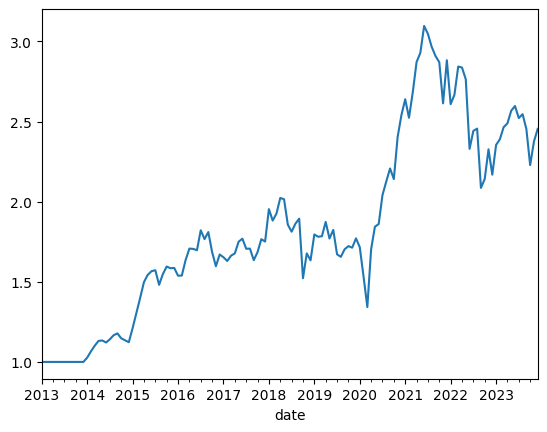

In [418]:
(total_return + 1).cumprod().plot()

<Axes: xlabel='date'>

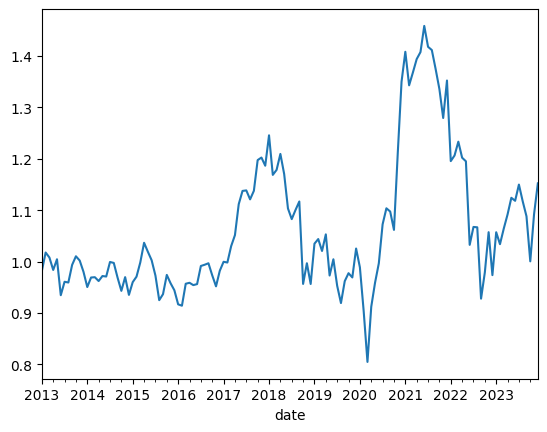

In [419]:
(mkf2000.sub(rf_m['rf'], axis=0)  + 1).cumprod().plot()

### 팩터 수익률 계산

In [420]:
START_DATE = '2016-01-01' # CMA가 t-2년까지 보기 때문에
# START_DATE = '2014-01-01'

In [421]:
# Rm - Rf

# FF_RmRf = krx300.sub(rf_m['rf'], axis=0) 
FF_RmRf = mkf2000.sub(rf_m['rf'], axis=0) 

FF_RmRf = FF_RmRf.loc[START_DATE:]

In [422]:
# HML, RMW, CMA, UMD, STR

F_bm_univ = FactorUniv(F_bm, 2) # HML
F_quality_univ = FactorUniv(F_quality, 2) # RMW
F_inv_univ = FactorUniv(F_inv, 2) # CMA
F_umd_univ = FactorUniv(F_umd, 3) # UMD
F_str_univ = FactorUniv(F_str, 3) # STR

F_size_univ = FactorUniv(F_size, 2) # SMB

FF_HML = XMY(F_size_univ, F_bm_univ, univ_mask_df, monthly_excess_returns, mkt_cap, 'ew', 'annual').f2_hml
FF_RMW = XMY(F_size_univ, F_quality_univ, univ_mask_df, monthly_excess_returns, mkt_cap, 'ew', 'annual').f2_hml
FF_CMA = XMY(F_size_univ, F_inv_univ, univ_mask_df, monthly_excess_returns, mkt_cap, 'ew', 'annual').f2_hml

FF_UMD = XMY(F_size_univ, F_umd_univ, univ_mask_df, monthly_excess_returns, mkt_cap, 'ew', 'monthly').f2_hml
FF_STR = XMY(F_size_univ, F_str_univ, univ_mask_df, monthly_excess_returns, mkt_cap, 'ew', 'monthly').f2_hml

# UMD, STR 팩터를 size 그룹과의 교차로 만들지 않고 그냥 단일 팩터 분위로 만들 경우

# # up minus down이니, high에서 low를 빼야함.
# FF_UMD = Portfolio(F_umd_univ.high_univ, monthly_excess_returns, mkt_cap, 'ew', 'monthly').port_returns \
# - Portfolio(F_umd_univ.low_univ, monthly_excess_returns, mkt_cap, 'ew', 'monthly').port_returns

# # 마찬가지로 high에서 low를 뺀다.
# FF_STR = Portfolio(F_str_univ.high_univ, monthly_excess_returns, mkt_cap, 'ew', 'monthly').port_returns \
# - Portfolio(F_str_univ.low_univ, monthly_excess_returns, mkt_cap, 'ew', 'monthly').port_returns

FF_HML = FF_HML.loc[START_DATE:]
FF_RMW = FF_RMW.loc[START_DATE:]
FF_CMA = FF_CMA.loc[START_DATE:]
FF_UMD = FF_UMD.loc[START_DATE:]
FF_STR = FF_STR.loc[START_DATE:]


In [423]:
# SMB

F_bm_univ = FactorUniv(F_bm, 3) # HML
F_quality_univ = FactorUniv(F_quality, 3) # RMW
F_inv_univ = FactorUniv(F_inv, 3) # CMA
F_umd_univ = FactorUniv(F_umd, 3) # UMD
F_str_univ = FactorUniv(F_str, 3) # STR

F_size_univ = FactorUniv(F_size, 2) # SMB

FF_SMB = SMB(F_size_univ, F_bm_univ, F_quality_univ, F_inv_univ, univ_mask_df, monthly_excess_returns, mkt_cap, 'ew', 'annual').SMB
FF_SMB = FF_SMB.loc[START_DATE:]

<Axes: xlabel='date'>

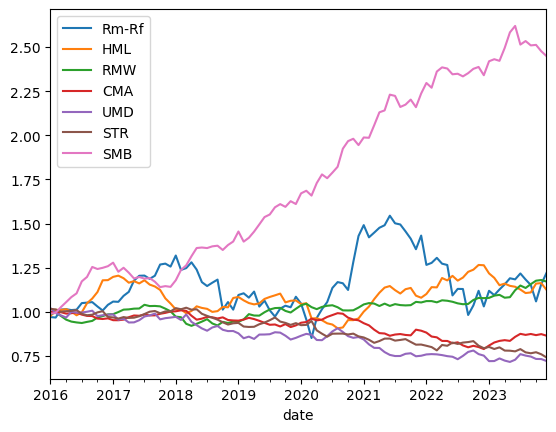

In [424]:
(FF_RmRf + 1).cumprod().plot(legend=True, label='Rm-Rf')

(FF_HML + 1).cumprod().plot(legend=True, label='HML')
(FF_RMW + 1).cumprod().plot(legend=True, label='RMW')
(FF_CMA + 1).cumprod().plot(legend=True, label='CMA')
(FF_UMD + 1).cumprod().plot(legend=True, label='UMD')
(FF_STR + 1).cumprod().plot(legend=True, label='STR')

(FF_SMB + 1).cumprod().plot(legend=True, label='SMB')

In [425]:
FF_table = pd.concat([FF_RmRf, FF_SMB, FF_HML, FF_RMW, FF_CMA, FF_UMD, FF_STR, rf_m], axis=1)
FF_table.columns = ['Rm-Rf', 'SMB', 'HML', 'RMW', 'CMA', 'UMD', 'STR', 'Rf']
FF_table = FF_table.loc[START_DATE:]
FF_table

,Rm-Rf,SMB,HML,RMW,CMA,UMD,STR,Rf
date,,,,,,,,
2016-01-31,-0.029014,-0.009905,-0.023421,-0.011558,0.002710,0.020971,0.017637,0.001314
2016-02-29,-0.002917,0.004722,0.036314,0.007344,-0.008589,-0.026581,-0.003401,0.001217
2016-03-31,0.046754,0.032712,-0.001101,-0.018457,0.004464,-0.013336,-0.013421,0.001246
2016-04-30,0.001963,0.027312,0.004578,-0.021457,-0.008031,-0.012560,0.003449,0.001237
2016-05-31,-0.004726,0.027130,-0.013641,-0.011563,0.002259,0.033516,0.002046,0.001226
...,...,...,...,...,...,...,...,...
2023-08-31,-0.028247,0.007968,-0.017655,-0.012029,-0.006831,-0.010690,-0.023242,0.002947
2023-09-30,-0.026193,-0.009737,0.003245,0.018995,0.005966,-0.007290,-0.006749,0.002993
2023-10-31,-0.080569,0.001181,0.045033,0.016974,-0.007399,-0.017924,0.007707,0.003069


## 팩터 데이터 검증

- fn dataguide에서 SMB, HML 팩터 데이터 추출 후 비교

### Load factor data

In [426]:
fnfactor_path = DATA_DIR / '고금계과제1_fn팩터_HMLSMBMOM.csv'

In [427]:
fnfactor = FnMarketData(fnfactor_path)

In [428]:
fnf = fnfactor.get_data(format='wide')
fnf = fnf.loc[START_DATE:END_DATE, :]
fnf.head()


Symbol Name,Size & Book Value(2X3) HML,Size & Book Value(2X3) SMB,Size & Momentum(2X3) Mom
date,,,
2016-01-31,-0.0331,-0.0110,0.0411
2016-02-29,0.0741,0.0070,-0.0710
2016-03-31,0.0225,0.0301,-0.0307
2016-04-30,-0.0018,0.0433,-0.0348
2016-05-31,-0.0316,0.0086,0.0359


In [429]:
fnf.columns = ['HML', 'SMB', 'MOM']

fn_hml = fnf['HML']
fn_smb = fnf['SMB']
fn_mom = fnf['MOM']

### compare

<Axes: xlabel='date'>

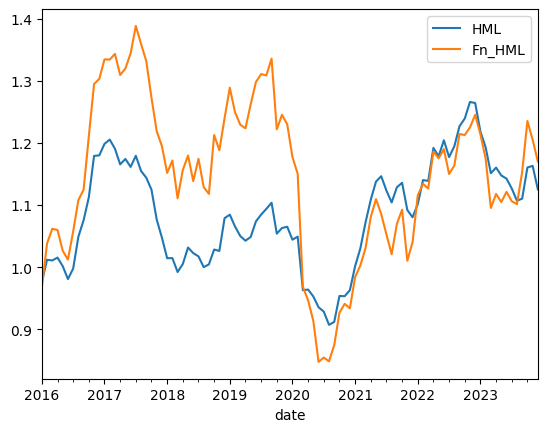

In [430]:
(FF_table['HML'] + 1).cumprod().plot(legend=True)
(fn_hml + 1).cumprod().plot(legend=True, label='Fn_HML')

<Axes: xlabel='date'>

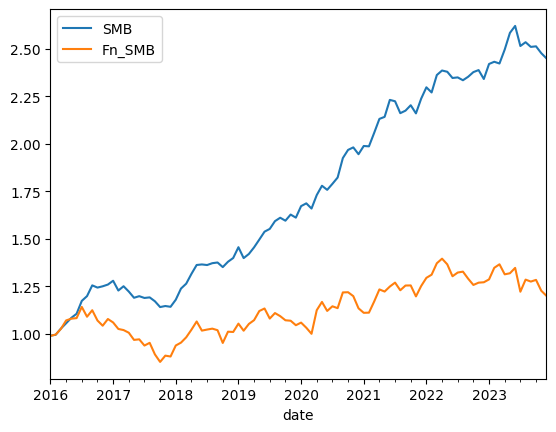

In [431]:
(FF_table['SMB'] + 1).cumprod().plot(legend=True) # ? 2020년부터 갑자기 방향이 서로 반대로 나오는 이유는 뭘까? 
(fn_smb + 1).cumprod().plot(legend=True, label='Fn_SMB')

<Axes: xlabel='date'>

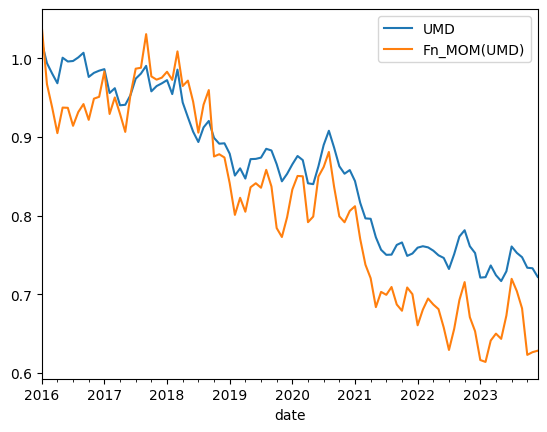

In [432]:
# 에프앤가이드에서는 모멘텀을 만들 때 size와 교차해서 만들었다는 것을 주의. 같은 방법으로 만든 팩터와 비교해야 함. 

(FF_table['UMD'] + 1).cumprod().plot(legend=True)
(fn_mom + 1).cumprod().plot(legend=True, label='Fn_MOM(UMD)')

## Devil's in HML's detail 

- Asness의 주장대로 B/M 계산시 B는 작년 12월을 쓰더라도 M은 최근 6월 주가를 사용
- 변경된 B/M 포트폴리오를 통해 결과 재산출